In [27]:
# ======================================
# 1. Import libraries
# ======================================
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

In [28]:
# ==========================================
# 2. Download TSLA stock data
# ==========================================
ticker = "TSLA"

df = yf.download(
    ticker,
    start="2018-01-01",
    end="2025-01-01",
    interval="1d"
)
df.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000
2018-01-09,22.246000,22.586666,21.826668,22.344000,107199000
2018-01-10,22.320000,22.466667,22.000000,22.146667,64648500
2018-01-11,22.530001,22.987333,22.217333,22.349333,99682500


In [29]:
# ==========================================
# 3. Use Close price only
# ==========================================
ts = df[['Close']].copy()

# make constant daily frequency
ts = ts.asfreq('D')

# fill missing values
ts['Close'] = ts['Close'].interpolate()

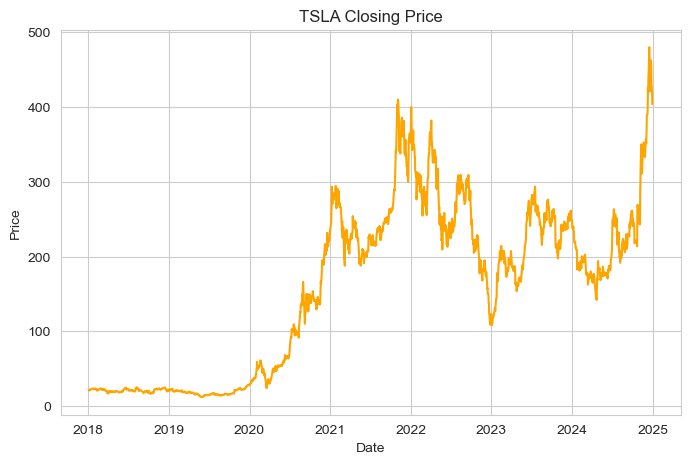

In [35]:
# ==========================================
# 4. Plot Original Time Series
# ==========================================
plt.figure(figsize=(8, 5))
plt.plot(ts['Close'], color="orange")
plt.title("TSLA Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

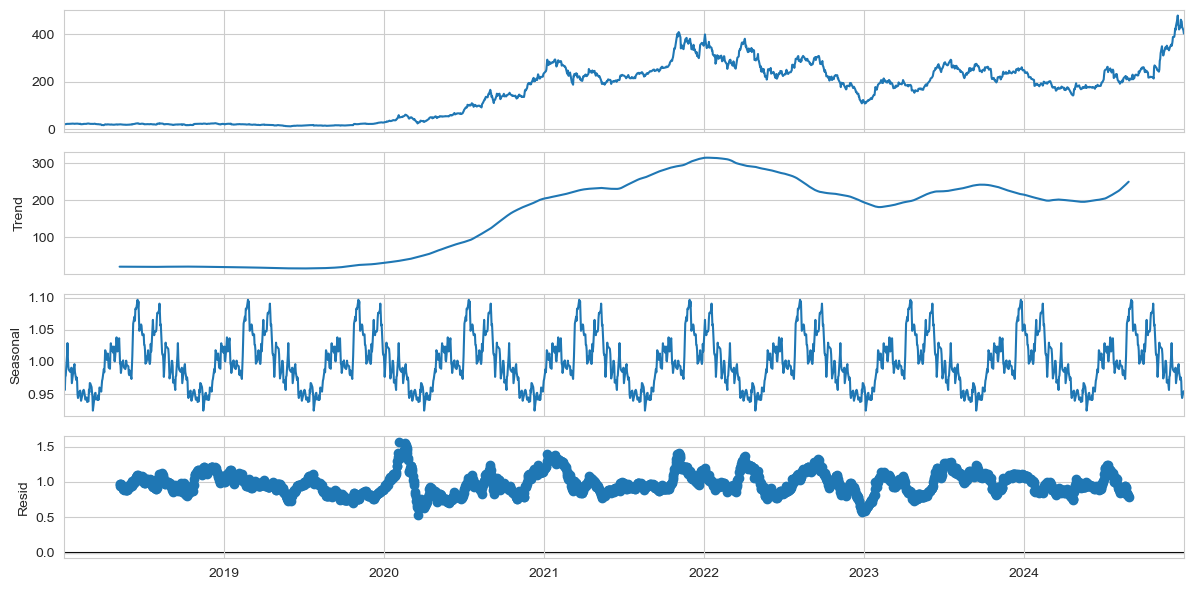

In [31]:
# ==========================================
# 5. Decomposition (T S R)
# ==========================================
result = seasonal_decompose(
    ts['Close'],
    model='multiplicative',
    period=252,
)

result.plot()
plt.show()

In [32]:
# ==========================================
# 6. Extract Components
# ==========================================
trend = result.trend
seasonal = result.seasonal
residual = result.resid

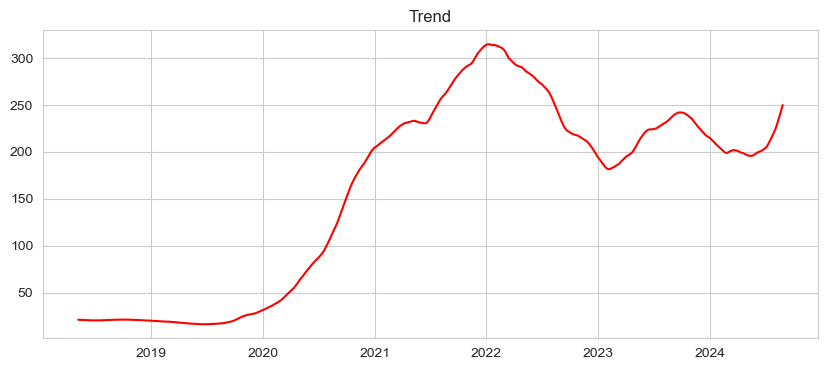

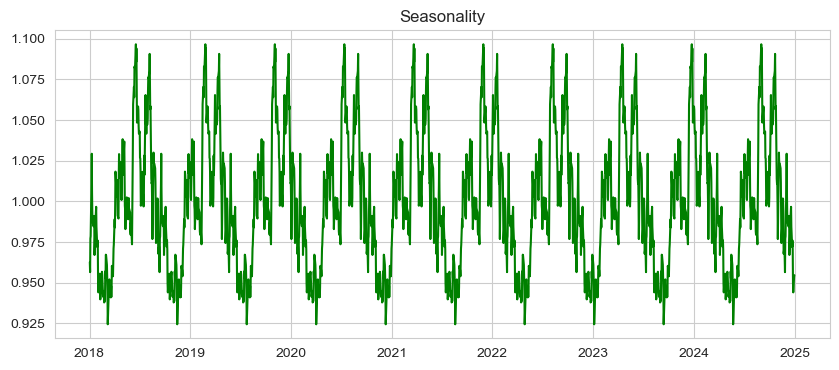

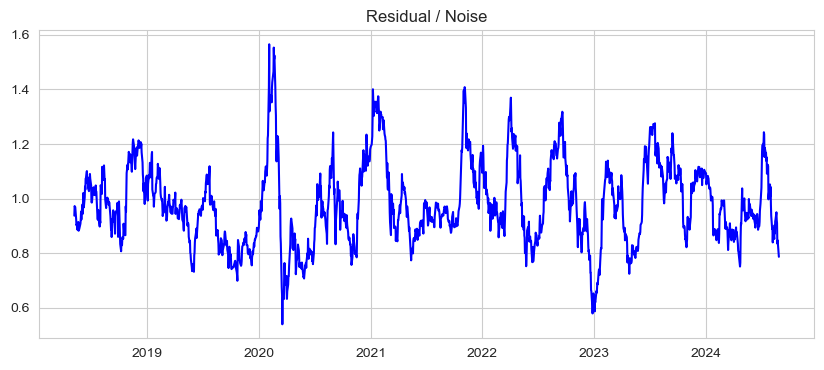

In [36]:
# ==========================================
# 7. Plot components separately
# ==========================================
plt.figure(figsize=(10, 4))
plt.plot(trend,color="red")
plt.title("Trend")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(seasonal,"green")
plt.title("Seasonality")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(residual,"blue")
plt.title("Residual / Noise")
plt.show()

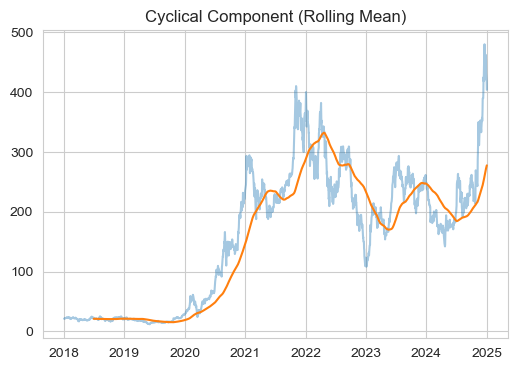

In [34]:
# ==========================================
# 8. Cyclical (long-term waves using rolling mean)
# ==========================================
cycle = ts['Close'].rolling(window=180).mean()

plt.figure(figsize=(6, 4))
plt.plot(ts['Close'], alpha=0.4)
plt.plot(cycle)
plt.title("Cyclical Component (Rolling Mean)")
plt.show()